# Habituation Dishabituation Data

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
# Get the root directory (adjust according to your folder structure)
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))  # Go up one directory to P2_Code

# Add the root directory to sys.path
sys.path.append(root_dir)

from group_tdt_class import *
from experiment_functions import *

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc_csvs"

# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\nac_csvs"

In [3]:
group_data = GroupTDTData(experiment_path, csv_base_path)
group_data.batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\mpfc\p4-240516-083255\Notes.txt
read from t=0s to t=1773.98s
Processing p1-240516-064158...
Processing p2-240516-071921...
Processing p3-240516-075659...
Processing p4-240516-083255...


In [4]:
group_data.hab_dishab_processing()

Processing p1-240516-064158...
Processing p2-240516-071921...
Processing p3-240516-075659...
Processing p4-240516-083255...


## Total duration

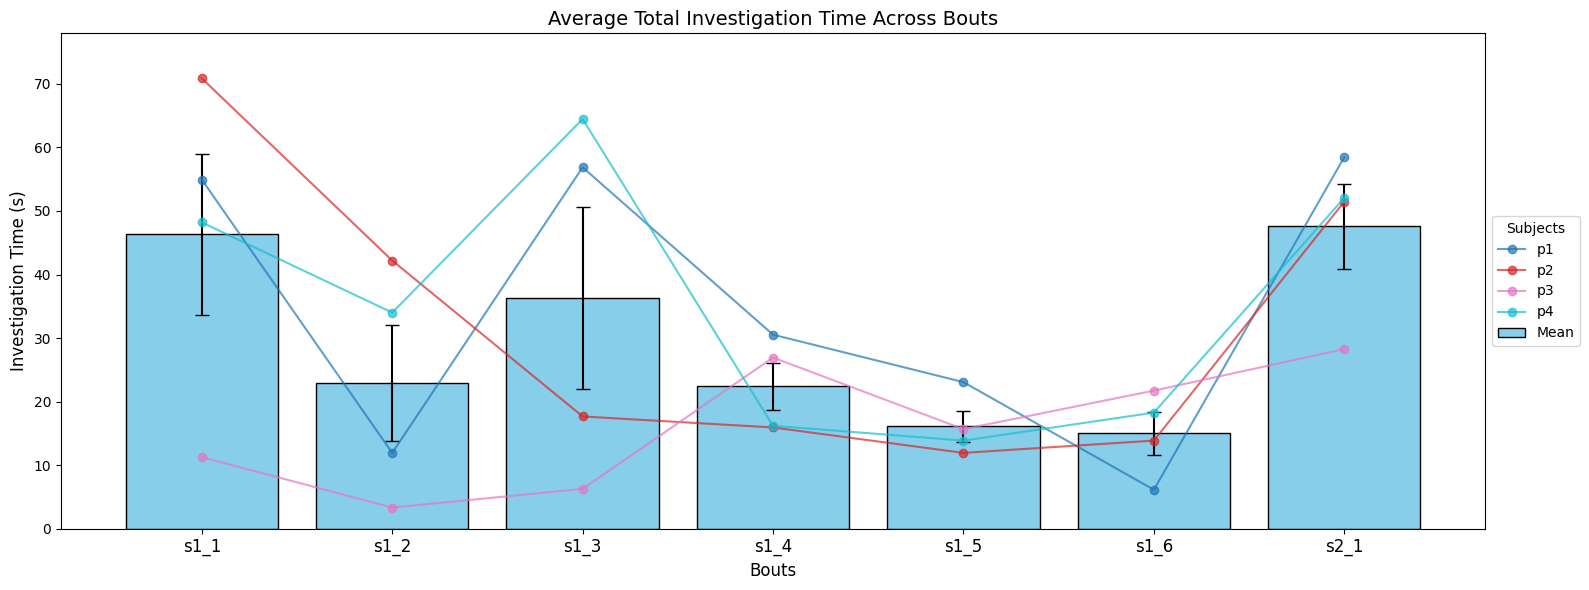

In [5]:
bouts = ['s1_1', 's1_2', 's1_3', 's1_4', 's1_5','s1_6','s2_1']
avg_inv_tot_duration_df = extract_total_behavior_durations(group_data=group_data, bouts=bouts, behavior = 'Investigation')
# avg_inv_tot_duration_df
plot_y_across_bouts(avg_inv_tot_duration_df, 'Average Total Investigation Time Across Bouts','Investigation Time (s)')

## Mean DA During 1st Investigation

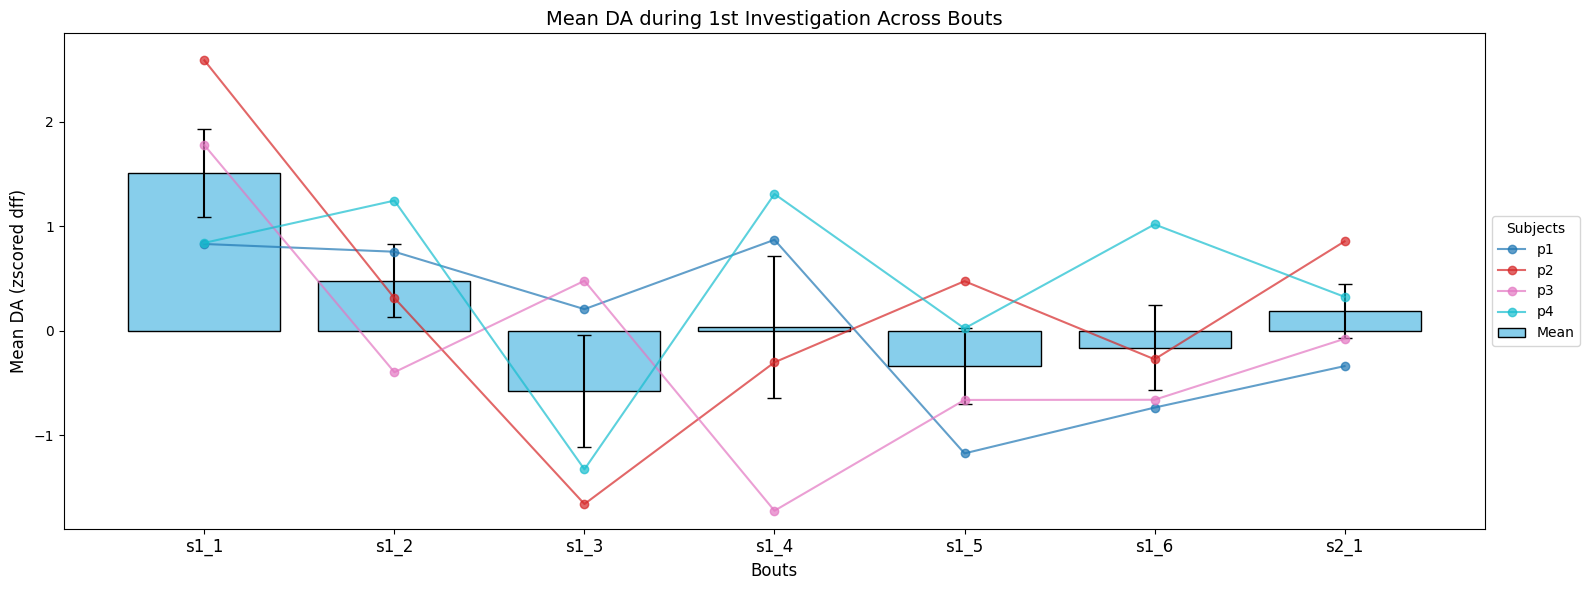

In [6]:
inv_1st_mean_df = extract_nth_behavior_mean_da(group_data=group_data, bouts=bouts, behavior='Investigation', n =1)

plot_y_across_bouts(inv_1st_mean_df, 'Mean DA during 1st Investigation Across Bouts','Mean DA (zscored dff)')

## All Investigations

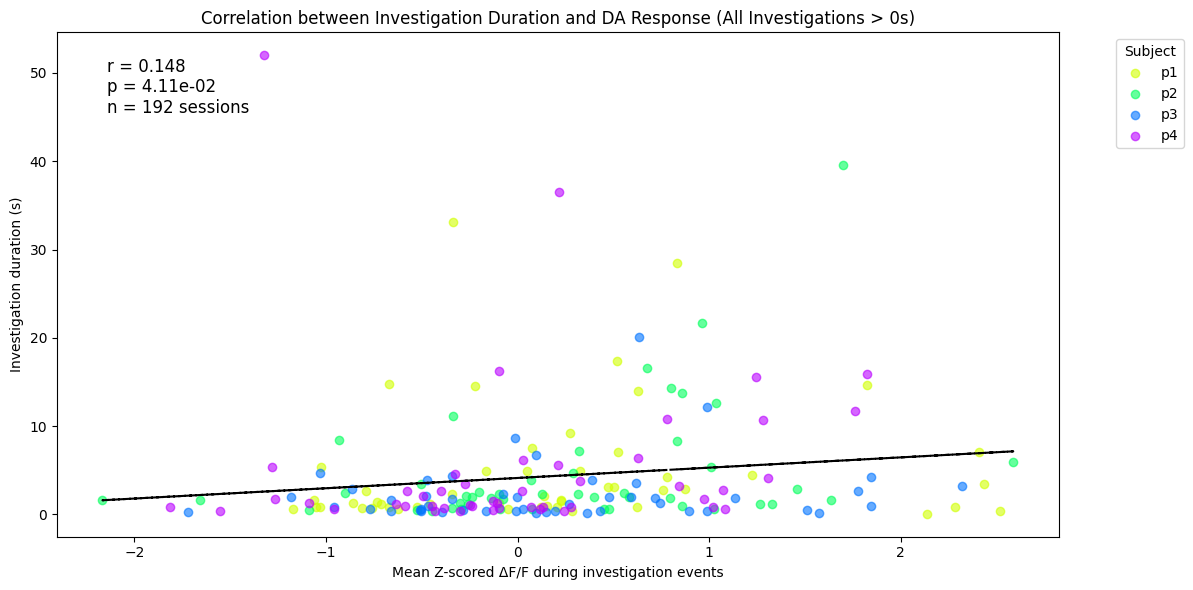

In [7]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

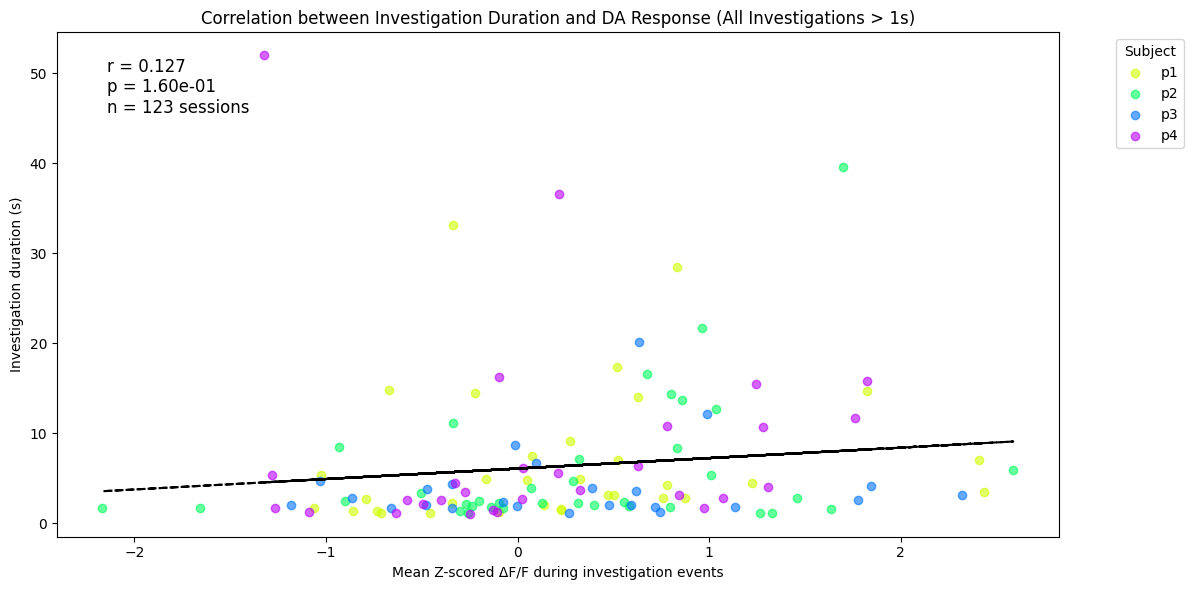

In [8]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=1)

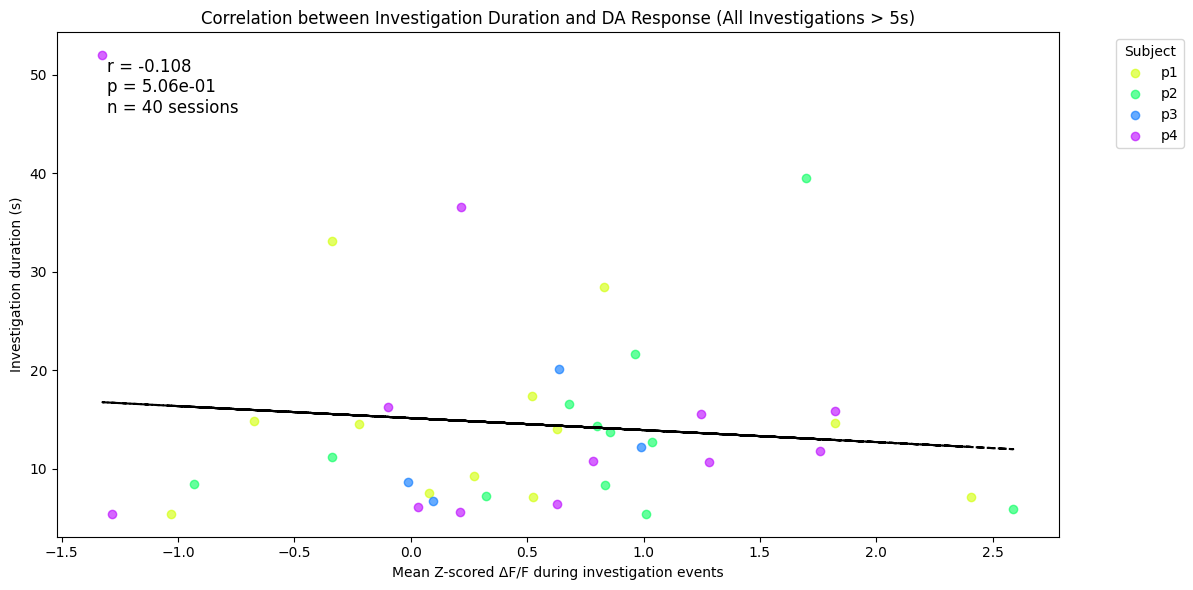

In [9]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=5)

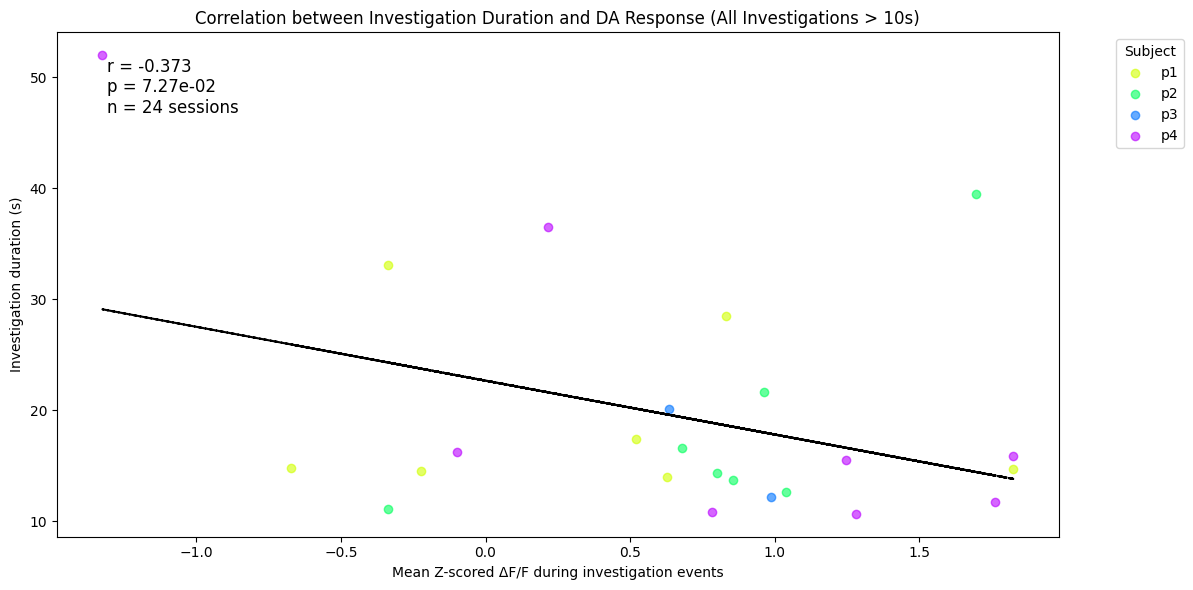

In [10]:
group_data.plot_all_behavior_vs_dff_all(behavior_name='Investigation', min_duration=10)


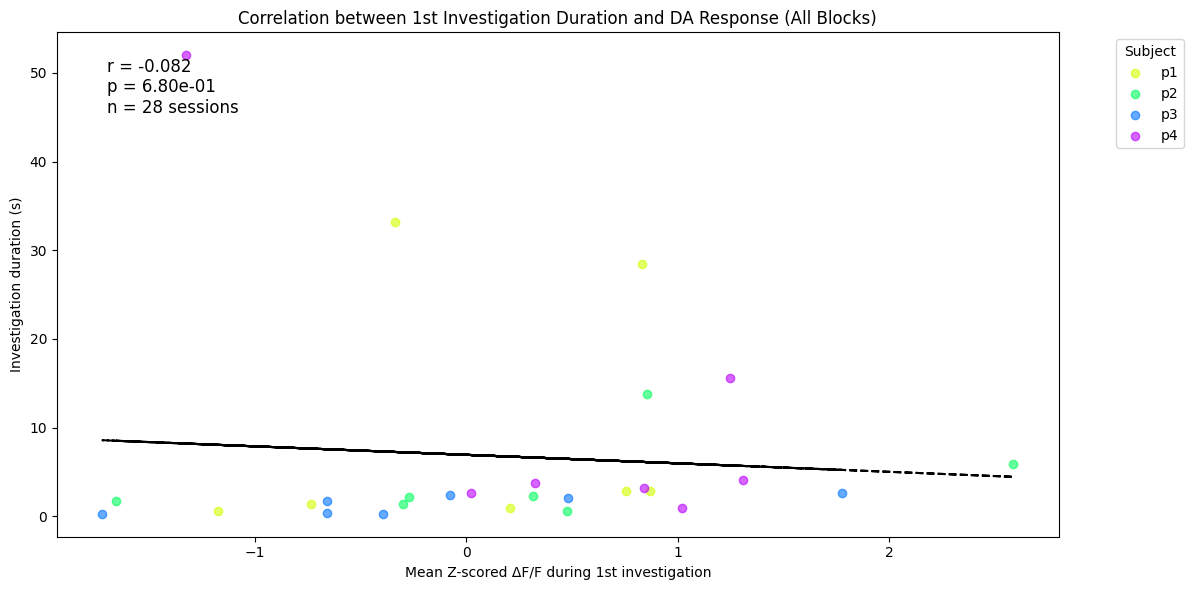

In [11]:
group_data.plot_1st_behavior_vs_dff_all(behavior_name='Investigation', min_duration=0)

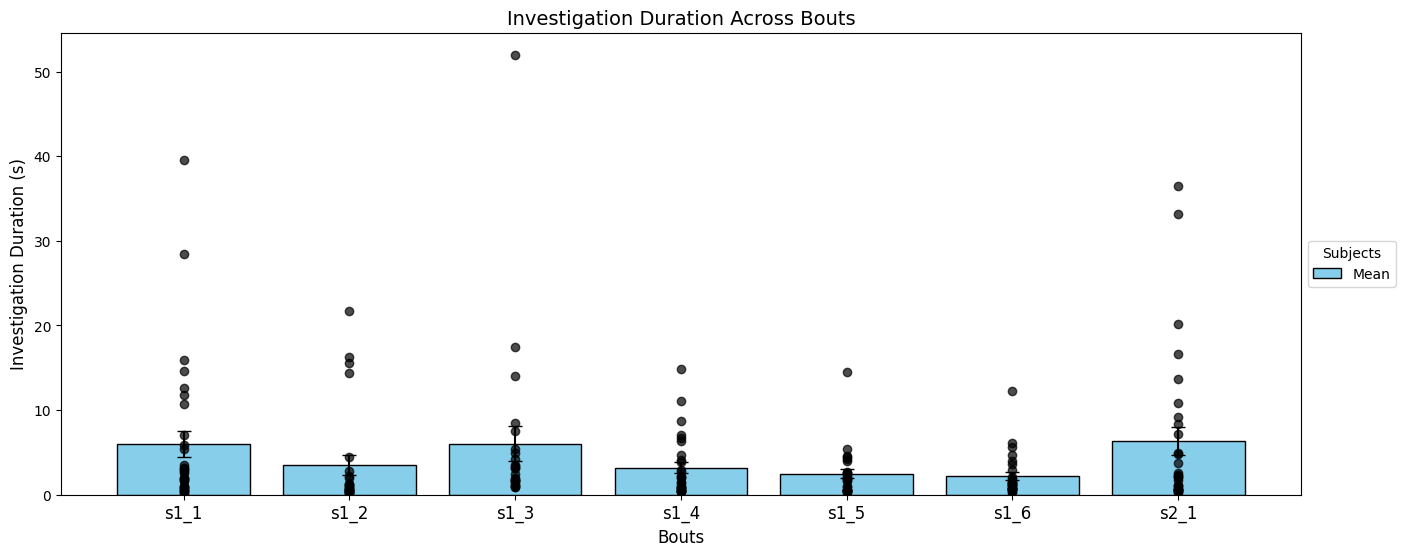

In [12]:
group_data.plot_behavior_durations_boutwise(behavior_name='Investigation', min_duration=0)

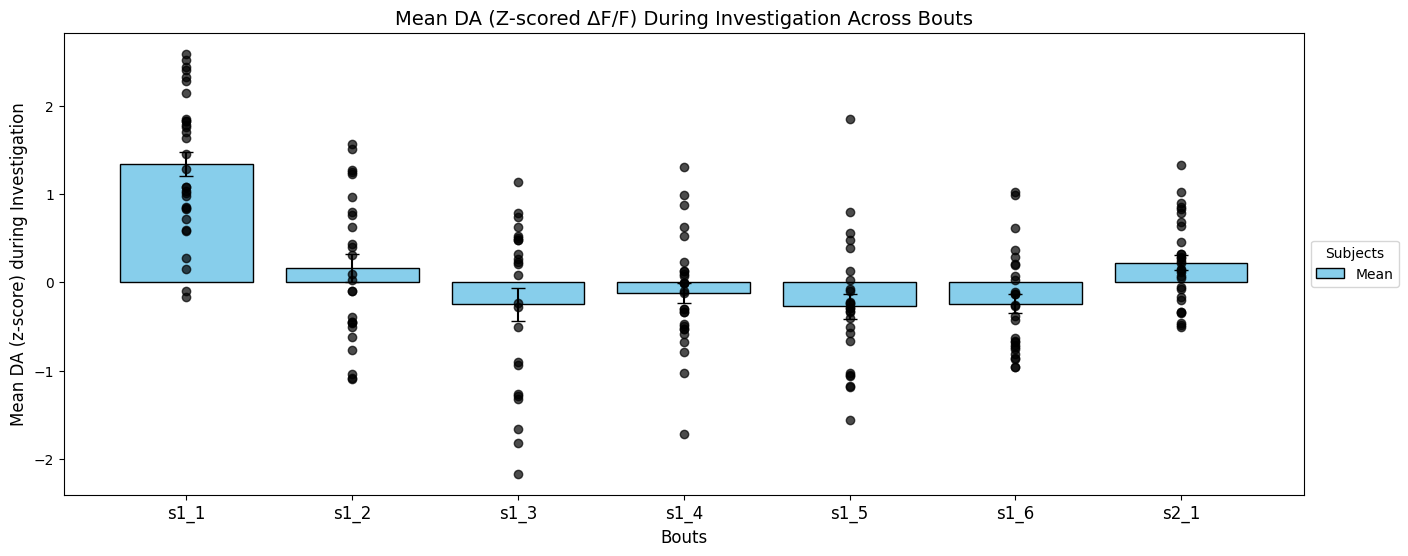

In [13]:
group_data.plot_behavior_mean_DA_boutwise(behavior_name='Investigation', min_duration=0)


In [14]:
group_data.plot_investigation_durations_boutwise()

AttributeError: 'GroupTDTData' object has no attribute 'plot_investigation_durations_boutwise'

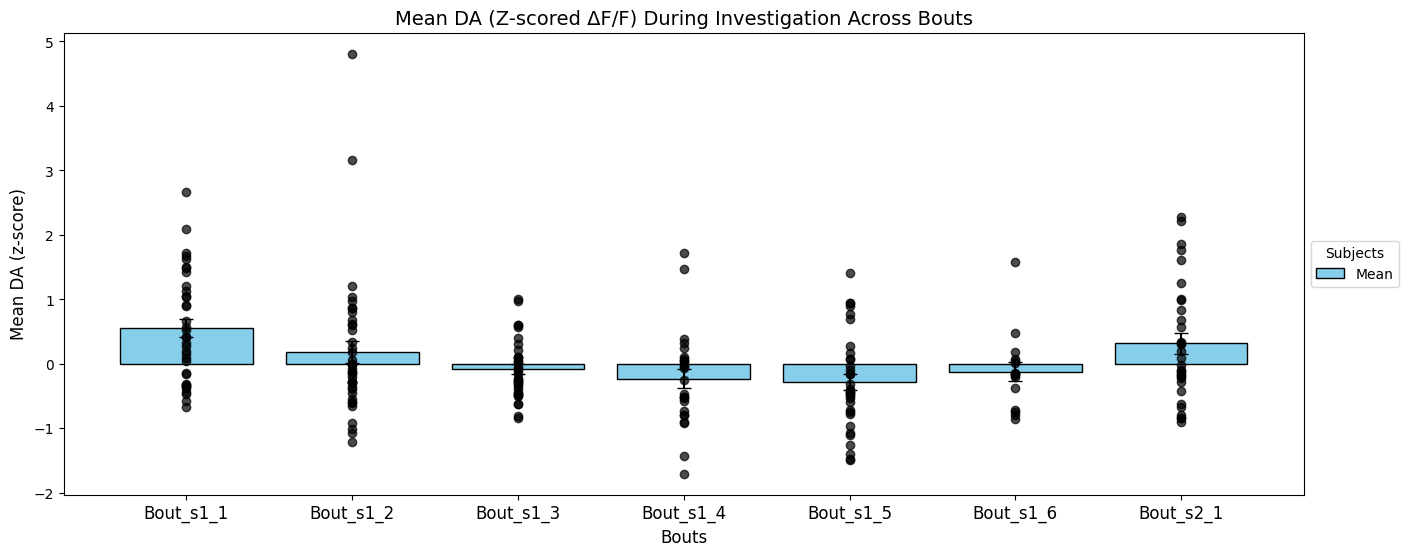

In [24]:
group_data.plot_investigation_mean_DA_boutwise()

In [ ]:
group_data.hab_dishab_plot_individual_behavior(behavior_name='all',plot_type='dFF',figsize=(20,8))